In [4]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.transforms
import seaborn as sns
import math
from math import sqrt, factorial
import re
from itertools import groupby
import scipy
import random
from decimal import Decimal
from operator import itemgetter
import multiprocessing
from CustomFunctions import PCvisualization
import itertools
def cllct_rslts(result):
    """Uses apply_async's callback to setup up a separate Queue for each process.
    This will allow us to collect the results from different threads."""
    results.extend(result)
def collect_results(result):
    """Uses apply_async's callback to setup up a separate Queue for each process.
    This will allow us to collect the results from different threads."""
    results.append(result)


#some functions that help find angles between planes

#https://keisan.casio.com/exec/system/1223596129
def plane_eq(points):
    p0 = points[0,:]
    p1 = points[1,:]
    p2 = points[2,:]
    v1 = [p1[0]-p0[0], p1[1]-p0[1], p1[2]-p0[2]]
    v2 = [p2[0]-p0[0], p2[1]-p0[1], p2[2]-p0[2]]
    abc = np.cross(v1, v2)
    d = np.array([abc[0]*p0[0], abc[1]*p0[1], abc[2]*p0[2]])
    return abc, d
# Function to find Angle
def distance(a1, b1, c1, a2, b2, c2):
     
    d = ( a1 * a2 + b1 * b2 + c1 * c2 )
    e1 = math.sqrt( a1 * a1 + b1 * b1 + c1 * c1)
    e2 = math.sqrt( a2 * a2 + b2 * b2 + c2 * c2)
    d = d / (e1 * e2)
    A = math.degrees(math.acos(d))
    return A

def angle(a1, b1, a2, b2):
     
    d = ( a1 * a2 + b1 * b2)
    e1 = math.sqrt( a1 * a1 + b1 * b1)
    e2 = math.sqrt( a2 * a2 + b2 * b2)
    d = d / (e1 * e2)
    A = math.degrees(math.acos(d))
    return A
def closest(lst, K):  
    return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]

In [2]:
#get directories and open separated datasets

time_interval = 10 #sec/frame

datadir = 'D:/Aaron/Data/Combined_Confocal_PCA_21bins/'
savedir = datadir + 'Galvanotaxis/'
if not os.path.exists(savedir):
    os.makedirs(savedir)

FullFrame = pd.read_csv(datadir + 'Shape_Metrics_transitionPCbins.csv', index_col=0)

nbins = np.max(FullFrame[[x for x in FullFrame.columns.to_list() if 'bin' in x]].to_numpy())

#open the centers of the binned PCs
centers = pd.read_csv(datadir+'PC_bin_centers.csv', index_col=0)


#which dates of these experiments to include
dates = ['20231019',
        '20231020']
#grab only the data from the days of these experiments
TotalFrame = FullFrame.iloc[[i for i,x in enumerate(FullFrame.cell) if x.split('_')[0] in dates]]

#add migration mode
migmod = []
for f in TotalFrame['frame'].to_list():
    if f<180:
        migmod.append('Random')
    # cells in the 4 minutes after the current is turned on ar "pre" galv
    elif f>=180 and f<205:
        migmod.append('Pre-Galvanotaxis')
    else:
        migmod.append('Galvanotaxis') 

# TotalFrame = FullFrame[FullFrame.cell.isin(include)]
#add the treatment categories
TotalFrame['Migration_Mode'] = pd.Categorical(migmod, categories=['Random','Pre-Galvanotaxis','Galvanotaxis'], ordered=True)
TotalFrame = TotalFrame.sort_values(by='Migration_Mode')




C:\Users\Aaron\anaconda3\envs\abhishape\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
################## how are the PC bins changing over time #########################
difflist = []
for i, d in TotalFrame[['CellID','Migration_Mode','frame','PC1bins','PC2bins','PC3bins','PC4bins']].sort_values(by='frame').groupby('CellID'):
    dtemp = d[['frame','PC1bins','PC2bins','PC3bins','PC4bins']].diff()
    dtemp = dtemp[dtemp.frame==1]
    dtemp['frame'] = d.frame[dtemp.index]
    dtemp['CellID'] =  [i]*len(dtemp)
    dtemp['Migration_Mode'] = d.Migration_Mode[dtemp.index]
    difflist.append(dtemp)
diffdf = pd.concat(difflist)

fig, axes = plt.subplots(4, 1, figsize=(20,40), sharey=True)
for a, ax in enumerate(axes):
    cpc = [x for x in diffdf.columns.to_list() if 'PC' in x][a]
    sns.boxplot(data=diffdf, x='frame', hue='Migration_Mode',y=cpc, ax=ax)
    ax.set_xticklabels(
        np.sort(diffdf.frame.unique()).astype(int),
        rotation=-45,
        fontsize = 12
        )
    #set axis titles
    ax.set_ylabel(cpc, fontsize = 30)
    ax.set_xlabel('Frame', fontsize = 22)
plt.tight_layout()
fig.savefig(savedir+'PC bin differentials.png', facecolor='white')

C:\Users\Aaron\anaconda3\envs\abhishape\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Aaron\anaconda3\envs\abhishape\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Aaron\anaconda3\envs\abhishape\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Aaron\anaconda3\envs\abhishape\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Aaron\anaconda3\envs\abhishape\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Aaron\anaconda3\envs\abhishape\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Aaron\anaconda3\envs\abhishape\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in 

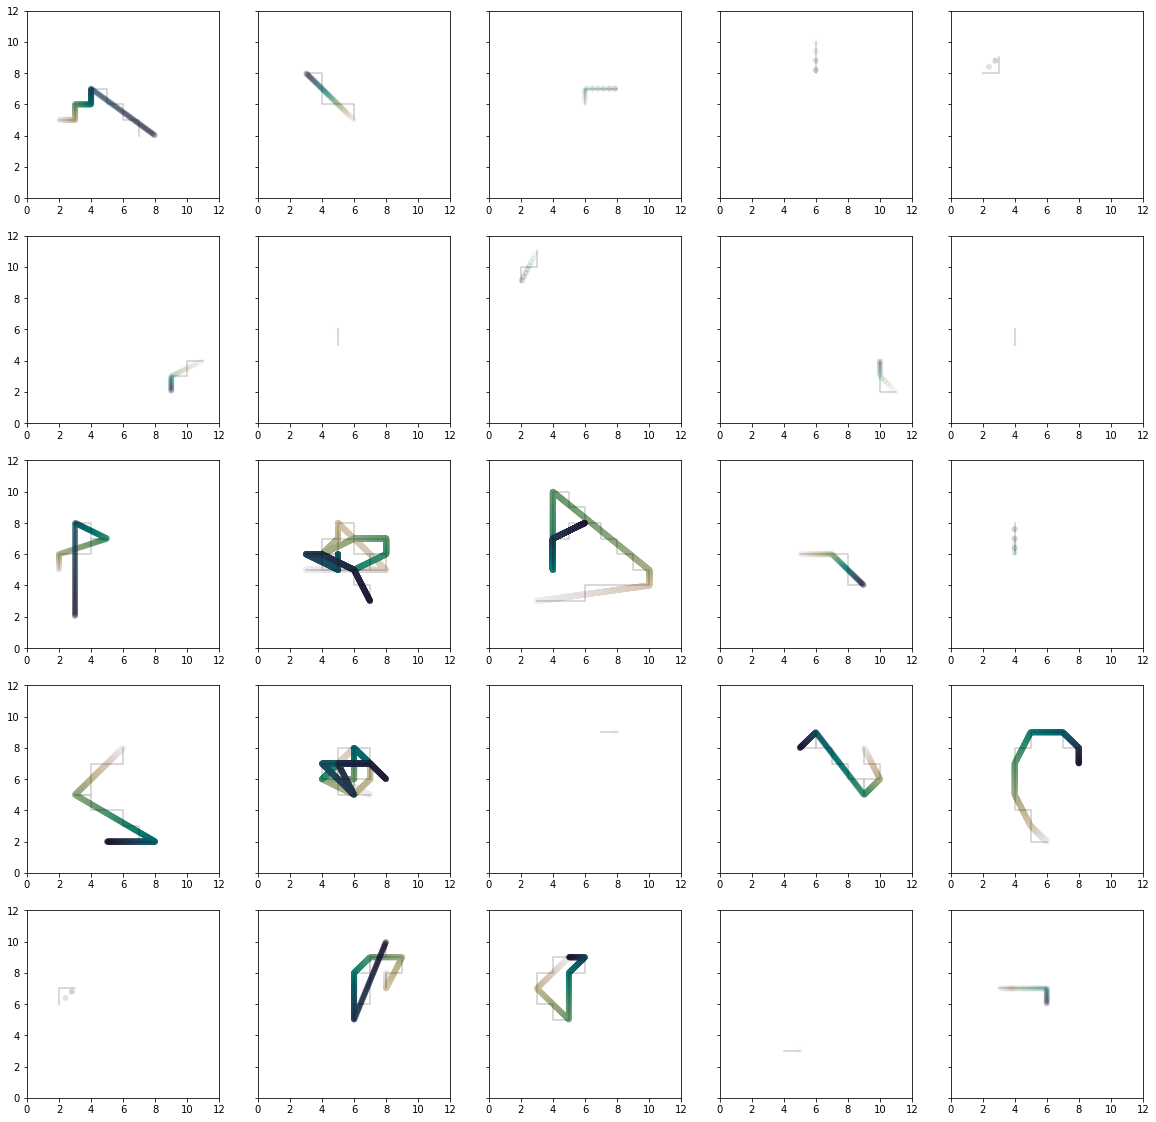

In [45]:
############# grid of plots of individual cells' INTERPOLATED transitions ###################

########### '20230509_488EGFP-CAAX_640SPY650-DNA2_cell_5' performs the exact loop #############

#the square root of plot number
pnum = 5
#randomly choose cells
sample = random.sample(list(transdf.CellID.unique()), pnum**2)

from cmocean import cm
norm = matplotlib.colors.Normalize()
cmm = cm.rain



fig, axes = plt.subplots(pnum,pnum,figsize=(20,20), sharey=True)
s = 0
#make numpy array with heatmap data
for x in range(pnum):
    for y in range(pnum):
        axes[x,y].set_xlim(0,nbins+1)
        axes[x,y].set_ylim(0,nbins+1)
        #get the next cell in the sample
        temp = transdf[transdf.CellID == sample[s]].reset_index(drop=True)
        #if temp is only 1 transition resample
        if len(temp)<2:
            temp = transdf[transdf.CellID == random.sample(list(transdf.CellID.unique()), 1)].reset_index(drop=True)
        #only get continuous frames 
        frames = temp[temp.frame.diff()>1].index.values
        if frames.size>0:
            if temp.index.values[0] != frames[0]:
                frames = np.append(temp.index.values[0], frames)
            if temp.index.values[-1] != frames[-1]:
                frames = np.append(frames, temp.index.values[-1])
            st = random.randrange(len(frames)-1)
            temp = temp.loc[frames[st]:frames[st+1]-1]
#             print(temp)
#         if s == len(sample)-1:
#             temp = alltrans.copy()
#             print(x,y)

        
        #get values of actual transitions based on the interpolated transitions
        fli = temp.frame.to_list()+[temp.frame.to_list()[-1]+1]
        acttemp = TotalFrame[(TotalFrame.CellID==temp.CellID.values[0])&(TotalFrame.frame.isin(fli))].sort_values(by='frame').reset_index(drop=True)
        #interpolate along the trajectory so I can plot dots which will represent the color gradient line
        px = acttemp.PC1bins.to_numpy()
        py = acttemp.PC2bins.to_numpy()
        pz = acttemp.frame.to_numpy()
        dist = np.nansum(scipy.spatial.distance.pdist(temp[['from_x','from_y']]))
        fx = scipy.interpolate.interp1d(np.arange(1,len(px)+1),px)
        newx = fx(np.arange(1,len(px), ((len(px)+1)-1)/(5*dist)))
        fy = scipy.interpolate.interp1d(np.arange(1,len(py)+1),py)
        newy = fy(np.arange(1,len(py), ((len(py)+1)-1)/(5*dist)))
        newz = np.arange(0,len(temp), len(temp)/len(newy))
        if len(newz)>len(newy):
            newz = newz[:-1]
        #normalize to the colors to the length of the trajectory
        norm.autoscale([0,newz.max()])
        #plot the actual transitions
        axes[x,y].scatter(newx,newy, color = cmm(norm(newz)), alpha = 0.2, edgecolors='none')
        
        #plot the interpolated transitions
        ix = np.append(temp.from_x.to_numpy(), temp.to_x.to_numpy()[-1])
        iy = np.append(temp.from_y.to_numpy(), temp.to_y.to_numpy()[-1])
        axes[x,y].plot(ix, iy, color ='black', alpha=0.2)
        
        #add one to the sample count
        s = s+1

In [23]:
########### interpolate all transitions so that only individual transitions are made ###########
from CustomFunctions.DetailedBalance import interpolate_2dtrajectory

time_interval = 10 #sec/frame


if (os.path.exists(savedir+'interpolated_PC1-PC2_transitions_separated.csv')) & (os.path.exists(savedir+'interpolated_PC1-PC2_transition_pairs_separated.csv')):
        
    transdf_sep = pd.read_csv(savedir+'interpolated_PC1-PC2_transitions_separated.csv', index_col=0)
    transpairsdf_sep = pd.read_csv(savedir+'interpolated_PC1-PC2_transition_pairs_separated.csv', index_col=0)
    print('Opened transition files')
    
    
    #ensure that DMSO is the first in order
    transdf_sep['Migration_Mode'] = pd.Categorical(transdf_sep.Migration_Mode, categories=['Random','Pre-Galvanotaxis','Galvanotaxis'], ordered=True)
    transdf_sep = transdf_sep.sort_values(by='Migration_Mode')
    transpairsdf_sep['Migration_Mode'] = pd.Categorical(transpairsdf_sep.Migration_Mode, categories=['Random','Pre-Galvanotaxis','Galvanotaxis'], ordered=True)
    transpairsdf_sep = transpairsdf_sep.sort_values(by='Migration_Mode')
    
else:
    if __name__ ==  '__main__':
        migresults = []
        for m, Mig in TotalFrame.groupby('Migration_Mode'):
            results = []
            pool = multiprocessing.Pool(processes=60)
            for i, cells in Mig.groupby('CellID'):
                cells = cells.sort_values('frame').reset_index(drop = True)
                runs = list()
                #######https://stackoverflow.com/questions/2361945/detecting-consecutive-integers-in-a-list
                for k, g in groupby(enumerate(cells['frame']), lambda ix: ix[0] - ix[1]):
                    currentrun = list(map(itemgetter(1), g))
                    list.append(runs, currentrun)

                for r in runs:
                    r = np.array(r, dtype=int)
                    #skip runs less than 3 frames long
                    if len(r)<2:
                        pass
                    else:
                        cell = cells.iloc[[cells[cells.frame==y].index[0] for y in r]]

                        pool.apply_async(interpolate_2dtrajectory, args = (
                            time_interval,
                            cell.CellID.iloc[0],
                            cell.frame.to_list(),
                            cell[['PC1bins','PC2bins']].to_numpy(),
                            ),
                            callback = collect_results)
            pool.close()
            pool.join()


            transdf_sep = pd.DataFrame(sum([r[0] for r in results],[]))
            transdf_sep = transdf_sep.sort_values(by = ['CellID','frame']).reset_index(drop=True)
            transpairsdf_sep = pd.DataFrame(sum([r[1] for r in results],[]))
            transdf_sep['Migration_Mode'] = pd.Categorical([m]*len(transdf_sep), categories=['Random','Pre-Galvanotaxis','Galvanotaxis'], ordered=True)
            transpairsdf_sep['Migration_Mode'] = pd.Categorical([m]*len(transpairsdf_sep), categories=['Random','Pre-Galvanotaxis','Galvanotaxis'], ordered=True)
            migresults.append([transdf_sep,transpairsdf_sep])

    transdf_sep = pd.concat([mi[0] for mi in migresults])
    transpairsdf_sep = pd.concat([mi[1] for mi in migresults])
    transdf_sep.to_csv(savedir+'interpolated_PC1-PC2_transitions_separated.csv')
    transpairsdf_sep.to_csv(savedir+'interpolated_PC1-PC2_transition_pairs_separated.csv')
    del migresults
    print('Finished interpolating trajectories')
############## get the counts of cells leaving 

from CustomFunctions.DetailedBalance import get_transition_counts
if os.path.exists(savedir+'PC1-PC2_binned_transition_rates_separated.csv'):
    trans_rate_df_sep = pd.read_csv(savedir+'PC1-PC2_binned_transition_rates_separated.csv', index_col=0)
    print('Opened transition rate files')
    
    #ensure that DMSO is the first in order
    trans_rate_df_sep['Migration_Mode'] = pd.Categorical(trans_rate_df_sep.Migration_Mode, categories=['Random','Pre-Galvanotaxis','Galvanotaxis'], ordered=True)
    trans_rate_df_sep = trans_rate_df_sep.sort_values(by='Migration_Mode')
else:
    trresults = []
    if __name__ ==  '__main__':
        for m, mig in transdf_sep.groupby('Migration_Mode'):
            ttot = mig.time_elapsed.sum()
            print(ttot)
            pool = multiprocessing.Pool(processes=60)
            results = []
            for x in range(nbins):
                for y in range(nbins):
                    fromm = mig[(mig['from_x'] == x+1) & (mig['from_y'] == y+1)].reset_index(drop=True).to_dict()
                    to = mig[(mig['to_x'] == x+1) & (mig['to_y'] == y+1)].reset_index(drop=True).to_dict()
                    pool.apply_async(get_transition_counts, args = (
                        x+1,
                        y+1,
                        fromm,
                        to,
                        ttot,
                        ),
                        callback = collect_results)
            pool.close()
            pool.join()

            trans_rate_df_sep = pd.DataFrame(results)
            trans_rate_df_sep['Migration_Mode'] = pd.Categorical([m]*len(trans_rate_df_sep), categories=['Random','Pre-Galvanotaxis','Galvanotaxis'], ordered=True)
            trans_rate_df_sep = trans_rate_df_sep.sort_values(by = ['x','y']).reset_index(drop=True)
            trresults.append(trans_rate_df_sep)

    trans_rate_df_sep = pd.concat(trresults)
    trans_rate_df_sep.to_csv(savedir+'PC1-PC2_binned_transition_rates_separated.csv')
    del trresults

    print('Finished finding transition rates')


############## BOOTSTRAP MANY TRAJECTORIES ##########
from CustomFunctions.DetailedBalance import bootstrap_trajectories

modes = transpairsdf_sep.Migration_Mode.unique()
#if a bootstrapped data file already exists, load it, otherwise make one
if (os.path.exists(savedir+f'{modes[0]}_bootstrapped_transitions.csv')) & (os.path.exists(savedir+f'{modes[1]}_bootstrapped_transitions.csv')):
    avg_cur_mode1 = pd.read_csv(savedir+f'{modes[0]}_bootstrapped_transitions.csv', index_col=0)
    avgavg_cur_mode1 = avg_cur_mode1.groupby(['x','y','Migration_Mode']).apply(np.mean)
    avgavg_cur_mode1 = avgavg_cur_mode1.drop(columns = ['x','y']).reset_index()
    avg_cur_mode2 = pd.read_csv(savedir+f'{modes[1]}_bootstrapped_transitions.csv', index_col=0)
    avgavg_cur_mode2 = avg_cur_mode2.groupby(['x','y','Migration_Mode']).apply(np.mean)
    avgavg_cur_mode2 = avgavg_cur_mode2.drop(columns = ['x','y']).reset_index()
    avg_cur_mode3 = pd.read_csv(savedir+f'{modes[2]}_bootstrapped_transitions.csv', index_col=0)
    avgavg_cur_mode3 = avg_cur_mode3.groupby(['x','y','Migration_Mode']).apply(np.mean)
    avgavg_cur_mode3 = avgavg_cur_mode3.drop(columns = ['x','y']).reset_index()
    bsframe_sep = pd.concat([avgavg_cur_mode1,avgavg_cur_mode2,avgavg_cur_mode3])
    bsframe_sep_full = pd.concat([avg_cur_mode1,avg_cur_mode2,avg_cur_mode3])
    del avg_cur_mode1
    del avg_cur_mode2
    del avg_cur_mode3
    del avgavg_cur_mode1
    del avgavg_cur_mode2
    del avgavg_cur_mode3

    
    #ensure that DMSO is the first in order
    bsframe_sep['Migration_Mode'] = pd.Categorical(bsframe_sep.Migration_Mode, categories=['Random','Pre-Galvanotaxis','Galvanotaxis'], ordered=True)
    bsframe_sep = bsframe_sep.sort_values(by='Migration_Mode')
    bsframe_sep_full['Migration_Mode'] = pd.Categorical(bsframe_sep_full.Migration_Mode, categories=['Random','Pre-Galvanotaxis','Galvanotaxis'], ordered=True)
    bsframe_sep_full = bsframe_sep_full.sort_values(by='Migration_Mode')
    print('Opened bootstrap file')
else:
    
    #set the total bootstrap time to the full time of a single video
    ttot = time_interval*TotalFrame.frame.max()
    
    bsresults = []
    #number of times to bootstrap
    bsiter = 5000

    for m, mig in transpairsdf_sep.groupby('Migration_Mode'):
        start = 0
        stop = 300
        allresults = []
        while start<bsiter:
            print(f'Finished {start}, starting {start}-{stop}')
            if __name__ ==  '__main__':
                pool = multiprocessing.Pool(processes=60)
                results = []
                for x in range(start,stop+1):
                    pool.apply_async(bootstrap_trajectories, args = (
                        mig,
                        ttot,
                        nbins,
                        ),
                        callback = collect_results)
                pool.close()
                pool.join()

                allresults.extend(results)

            start = stop + 1
            stop = stop + 300
            if stop>bsiter:
                stop = bsiter

        migboot = pd.concat(allresults)
        migboot['Migration_Mode'] = pd.Categorical([m]*len(migboot), categories=['Random','Pre-Galvanotaxis','Galvanotaxis'], ordered=True)
        iters = [[x]*(nbins**2) for x in range(int(len(migboot)/(nbins**2)))]#, len(migboot)
        migboot['bs_iteration'] = list(itertools.chain.from_iterable(iters))
        migboot.to_csv(savedir+f'{m}_bootstrapped_transitions.csv')
        bsresults.append(migboot)
        

    bsframe_sep = pd.concat(bsresults)
    del results
    del allresults
    print('Finished bootstrapping')

    
#### get current field for this bootstrap realization ######
####### this is for looking at data spread for the current field ############
bsfield = []
for m, mig in bsframe_sep.groupby('Migration_Mode'):
    for x in range(nbins):
        for y in range(nbins):
            current = mig[(mig['x'] == x+1) & (mig['y'] == y+1)]
            cov = np.array([[(current.x_plus_rate.mean()-current.x_minus_rate.mean()/2),0],
                    [0, (current.y_plus_rate.mean()-current.y_minus_rate.mean())/2]])
            evals, evecs = np.linalg.eigh(cov)
            bsfield.append({'x':x+1,
                            'y':y+1,
                            'eval1':evals[1],
                            'eval2':evals[0],
                           'evec1x':evecs[0,1],
                           'evec1y':evecs[1,1],
                           'evec2x':evecs[0,0],
                           'evec2y':evecs[1,0],
                          'Migration_Mode':m})
        
bsfield_sep = pd.DataFrame(bsfield)

Opened transition files
Opened transition rate files


C:\Users\Aaron\anaconda3\envs\abhishape\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Opened bootstrap file


C:\Users\Aaron\anaconda3\envs\abhishape\lib\site-packages\ipykernel_launcher.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator


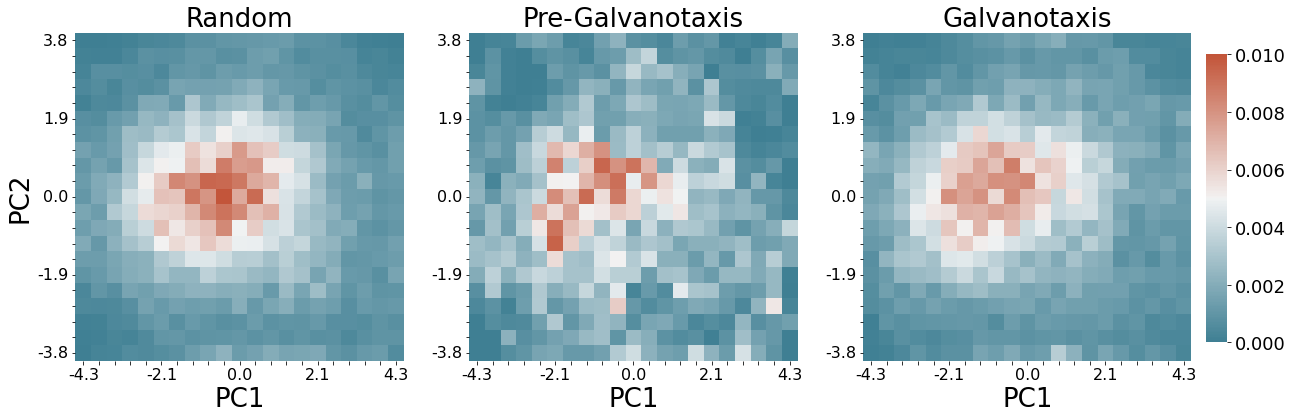

In [7]:
########### PLOT THE DISTRIBUTIONS OF THE SEPARATED MIGRATION MODES #############



fig, axes = plt.subplots(1,len(transdf_sep.Migration_Mode.unique()),figsize=(20,10))
#single colorbar axis
cbar_ax = fig.add_axes([.91, .3, .015, .4])

for i, ax in enumerate(axes):
    mm = transdf_sep.Migration_Mode.unique()[i]
    mdf = transdf_sep[transdf_sep.Migration_Mode==mm]
    ttot = mdf.time_elapsed.sum()
    ################ heatmap of probability density #############
    #make numpy array with heatmap data
    bighm = np.zeros((nbins,nbins))
    #get total time observed in the system

    for x in range(nbins):
        for y in range(nbins):
            current =  mdf[(mdf['from_x'] == x+1) & (mdf['from_y'] == y+1)]
            if current.empty:
                bighm[y,x] = 0
            else:
                bighm[y,x] = current.time_elapsed.sum()/ttot

        
    #plot heatmap with seaborn
    sns.heatmap(
        bighm,
        vmin=0, vmax=0.01, #center=0,
        cmap=sns.diverging_palette(220, 20, n=200),
        square=True,
        xticklabels = True,
        yticklabels = True,
        ax = ax,
        cbar=i==0,
        cbar_ax = None if i else cbar_ax,
#         cbar_kws=cbar_kws
    )
    ax.set_xticklabels(
        [round(x,1) for x in centers.PC1.to_list()],
        fontsize = 16
    )
    ax.set_yticklabels(
        [round(x,1) for x in centers.PC2.to_list()],
        rotation=0,
        fontsize = 16
    )
    #take out all axis labels except the desired ones
    for i, l in enumerate(ax.xaxis.get_ticklabels()):
        if i%5 != 0:
            l.set_visible(False)
    for i, l in enumerate(ax.yaxis.get_ticklabels()):
        if i%5 != 0:
            l.set_visible(False)
    #set axis titles
    ax.set_xlabel('PC1', fontsize = 26)

    #correct axis orientations
    ax.invert_yaxis()
    #set title
    ax.set_title(mm, fontsize = 26)


# adjust colorbar tick label size
cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(),fontsize=18)
#set axis title
axes[0].set_ylabel('PC2', fontsize = 26)
    
plt.savefig(savedir + 'PC1_PC2 probability density heatmap separated.png', bbox_inches='tight')

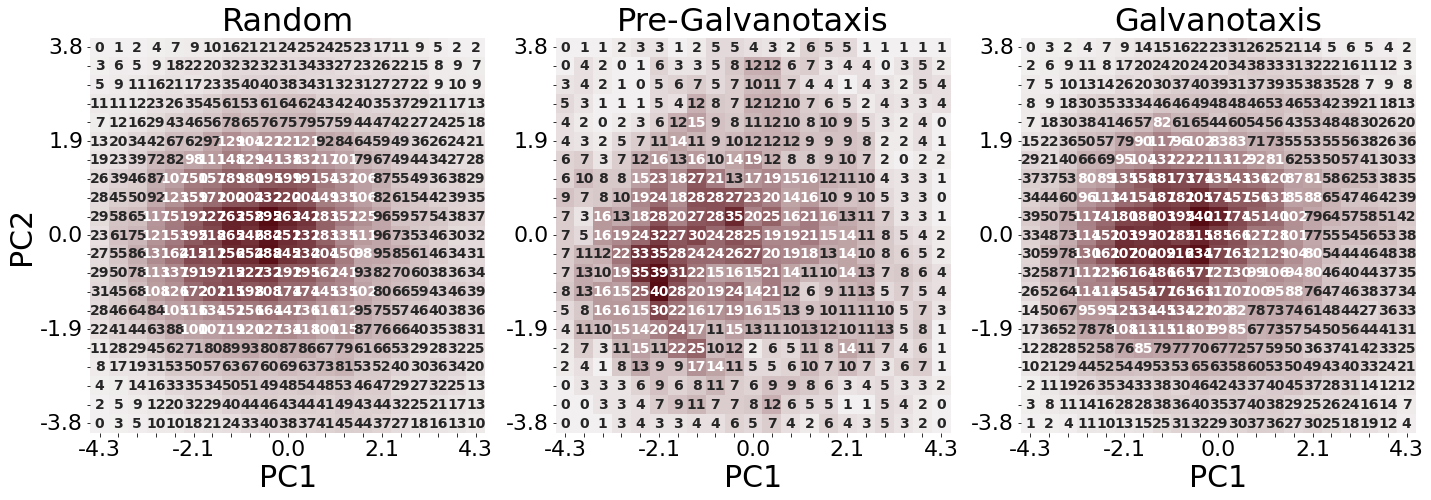

In [8]:
########### PLOT THE COUNTS OF THE BINS OF THE SEPARATED MIGRATION MODES #############

fig, axes = plt.subplots(1,len(transdf_sep.Migration_Mode.unique()),figsize=(20,10))
#single colorbar axis
# cbar_ax = fig.add_axes([.91, .3, .015, .4])

for i, ax in enumerate(axes):
    mm = transdf_sep.Migration_Mode.unique()[i]
    mdf = transdf_sep[transdf_sep.Migration_Mode==mm]
    ttot = mdf.time_elapsed.sum()
    ################ heatmap of probability density #############
    #make numpy array with heatmap data
    bighm = np.zeros((nbins,nbins))
    #get total time observed in the system

    for x in range(nbins):
        for y in range(nbins):
            current =  mdf[(mdf['from_x'] == x+1) & (mdf['from_y'] == y+1)]
            if current.empty:
                bighm[y,x] = 0
            else:
                bighm[y,x] = len(current)

        
    #plot heatmap with seaborn
    sns.heatmap(
        bighm,
        vmin=np.min(bighm[np.nonzero(bighm)]),
        vmax=bighm.max(), #center=0,
        cmap=sns.light_palette('#570b13', as_cmap=True),
        square=True,
        xticklabels = True,
        yticklabels = True,
        annot = True,
        annot_kws={"size":14,
                  'fontweight':'bold'},
        fmt = '.0f',
        ax = ax,
        cbar=False,
#         cbar_ax = None if i else cbar_ax,
#         cbar_kws={'shrink':.5}
    )
    ax.set_xticklabels(
        [round(x,1) for x in centers.PC1.to_list()],
        fontsize = 22
    )
    ax.set_yticklabels(
        [round(x,1) for x in centers.PC2.to_list()],
        rotation=0,
        fontsize = 22
    )
    #take out all axis labels except the desired ones
    for i, l in enumerate(ax.xaxis.get_ticklabels()):
        if i%5 != 0:
            l.set_visible(False)
    for i, l in enumerate(ax.yaxis.get_ticklabels()):
        if i%5 != 0:
            l.set_visible(False)
    #set axis titles
    ax.set_xlabel('PC1', fontsize = 30)

    #correct axis orientations
    ax.invert_yaxis()
    #set title
    ax.set_title(mm, fontsize = 32)


# adjust colorbar tick label size
# cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(),fontsize=18)
#set axis title
axes[0].set_ylabel('PC2', fontsize = 30)
plt.tight_layout()
plt.savefig(savedir + 'PC1_PC2 counts heatmap separated.png', bbox_inches='tight', dpi = 500)

C:\Users\Aaron\anaconda3\envs\abhishape\lib\site-packages\ipykernel_launcher.py:63: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\Aaron\anaconda3\envs\abhishape\lib\site-packages\ipykernel_launcher.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


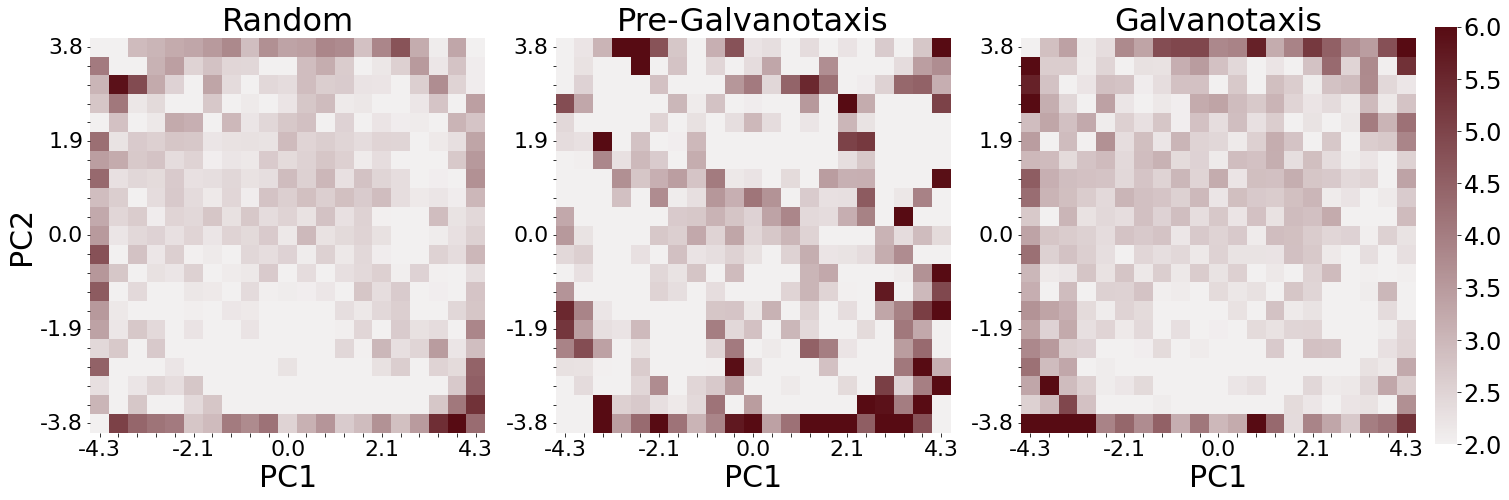

In [19]:
########### PLOT THE DWELL TIME OF THE MIGRATION MODES IN THE CGPS #############
from cmocean import cm
fig, axes = plt.subplots(1,len(transdf_sep.Migration_Mode.unique()),figsize=(20,10))
#single colorbar axis
cbar_ax = fig.add_axes([.999, .21, .015, .58])

for i, ax in enumerate(axes):
    mm = transdf_sep.Migration_Mode.unique()[i]
    mdf = transdf_sep[transdf_sep.Migration_Mode==mm]
    ################ heatmap of probability density #############
    #make numpy array with heatmap data
    bighm = np.zeros((nbins,nbins))
    #get total time observed in the system

    for x in range(nbins):
        for y in range(nbins):
            current =  mdf[(mdf['from_x'] == x+1) & (mdf['from_y'] == y+1)]
            if current.empty:
                bighm[y,x] = 0
            else:
                bighm[y,x] = current.time_elapsed.mean()

        
    #plot heatmap with seaborn
    sns.heatmap(
        bighm,
        vmin=2, vmax=6, #center=0,
        cmap=sns.light_palette('#570b13', as_cmap=True),
        square=True,
        xticklabels = True,
        yticklabels = True,
        ax = ax,
        cbar=i==0,
        cbar_ax = None if i else cbar_ax,
#         cbar_kws=cbar_kws
    )
    ax.set_xticklabels(
        [round(x,1) for x in centers.PC1.to_list()],
        fontsize = 22
    )
    ax.set_yticklabels(
        [round(x,1) for x in centers.PC2.to_list()],
        rotation=0,
        fontsize = 22
    )
    #take out all axis labels except the desired ones
    for i, l in enumerate(ax.xaxis.get_ticklabels()):
        if i%5 != 0:
            l.set_visible(False)
    for i, l in enumerate(ax.yaxis.get_ticklabels()):
        if i%5 != 0:
            l.set_visible(False)
    #set axis titles
    ax.set_xlabel('PC1', fontsize = 30)

    #correct axis orientations
    ax.invert_yaxis()
    #set title
    ax.set_title(mm, fontsize = 32)


# adjust colorbar tick label size
cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(),fontsize=24)
#set axis title
axes[0].set_ylabel('PC2', fontsize = 30)
plt.tight_layout()
plt.savefig(savedir + 'PC1_PC2 probability dwell time heatmap separated.png', bbox_inches='tight', dpi = 500)

C:\Users\Aaron\anaconda3\envs\abhishape\lib\site-packages\ipykernel_launcher.py:63: UserWarning: FixedFormatter should only be used together with FixedLocator


Text(137.75, 0.5, 'PC2')

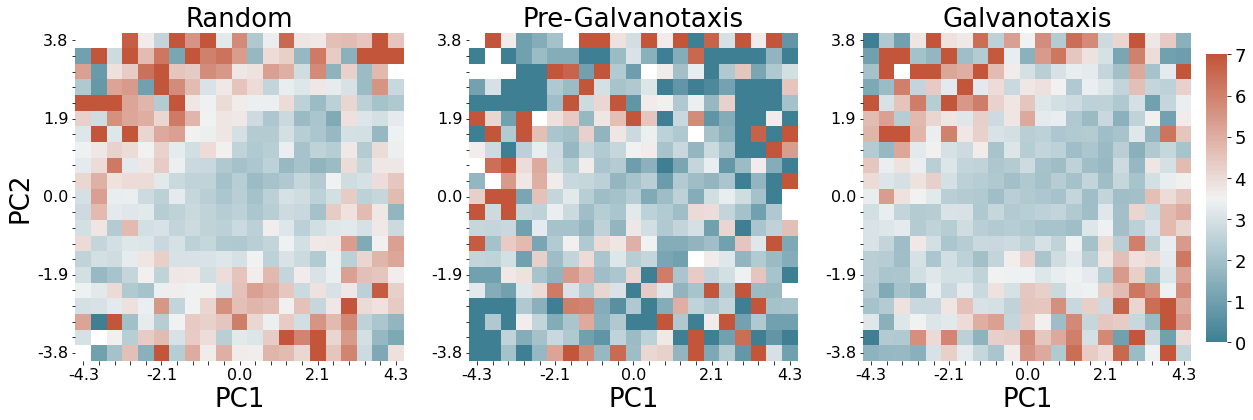

In [11]:

########### PLOT DISTANCE TRAVELLED FROM THE MIGRATION MODES IN THE CGPS #############

fig, axes = plt.subplots(1,len(transdf_sep.Migration_Mode.unique()),figsize=(20,10))
#single colorbar axis
cbar_ax = fig.add_axes([.91, .3, .015, .4])

for i, ax in enumerate(axes):
    mm = TotalFrame.Migration_Mode.unique()[i]
    mdf = TotalFrame[TotalFrame.Migration_Mode==mm]
    ################ heatmap of probability density #############
    #make numpy array with heatmap data
    bighm = np.zeros((nbins,nbins))
    #get total time observed in the system

    for x in range(nbins):
        for y in range(nbins):
            current =  mdf[(mdf['PC1bins'] == x+1) & (mdf['PC2bins'] == y+1)]
            if current.empty:
                bighm[y,x] = 0
            else:
                bighm[y,x] = current.PC1_PC2_distance_to.mean()

        
    #plot heatmap with seaborn
    sns.heatmap(
        bighm,
        vmin=0, vmax=7, #center=0,
        cmap=sns.diverging_palette(220, 20, n=200),
        square=True,
        xticklabels = True,
        yticklabels = True,
        ax = ax,
        cbar=i==0,
        cbar_ax = None if i else cbar_ax,
#         cbar_kws=cbar_kws
    )
    ax.set_xticklabels(
        [round(x,1) for x in centers.PC1.to_list()],
        fontsize = 16
    )
    ax.set_yticklabels(
        [round(x,1) for x in centers.PC2.to_list()],
        rotation=0,
        fontsize = 16
    )
    #take out all axis labels except the desired ones
    for i, l in enumerate(ax.xaxis.get_ticklabels()):
        if i%5 != 0:
            l.set_visible(False)
    for i, l in enumerate(ax.yaxis.get_ticklabels()):
        if i%5 != 0:
            l.set_visible(False)
    #set axis titles
    ax.set_xlabel('PC1', fontsize = 26)

    #correct axis orientations
    ax.invert_yaxis()
    #set title
    ax.set_title(mm, fontsize = 26)


# adjust colorbar tick label size
cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(),fontsize=18)
#set axis title
axes[0].set_ylabel('PC2', fontsize = 26)
    
# plt.savefig(savedir + 'PC1_PC2 probability dwell time heatmap separated.png', bbox_inches='tight')

In [12]:
#### get current field for this bootstrap realization ######
####### this is for looking at data spread for the current field ############
bsfield = []
for m, mig in bsframe_sep.groupby('Migration_Mode'):
    for x in range(nbins):
        for y in range(nbins):
            current = mig[(mig['x'] == x+1) & (mig['y'] == y+1)]
            cov = np.cov(np.array([[-current.x_minus_rate.values[0]/2, current.x_plus_rate.values[0]/2,0,0],
                    [0,0,-current.y_minus_rate.values[0]/2, current.y_plus_rate.values[0]/2]]))
            evals, evecs = np.linalg.eigh(cov)
            bsfield.append({'x':x+1,
                            'y':y+1,
                            'eval1':evals[1],
                            'eval2':evals[0],
                           'evec1x':evecs[0,1],
                           'evec1y':evecs[1,1],
                           'evec2x':evecs[0,0],
                           'evec2y':evecs[1,0],
                          'Migration_Mode':m})
        
bsfield_sep = pd.DataFrame(bsfield)

In [4]:
#### get current field for this bootstrap realization ######
####### this is for looking at data spread for the current field ############
bsfield = []
for m, mig in bsframe_sep.groupby('Migration_Mode'):
    for x in range(nbins):
        for y in range(nbins):
            current = mig[(mig['x'] == x+1) & (mig['y'] == y+1)]
            cov = np.array([[(current.x_plus_rate.mean()-current.x_minus_rate.mean()/2),0],
                    [0, (current.y_plus_rate.mean()-current.y_minus_rate.mean())/2]])
            evals, evecs = np.linalg.eigh(cov)
            bsfield.append({'x':x+1,
                            'y':y+1,
                            'eval1':evals[1],
                            'eval2':evals[0],
                           'evec1x':evecs[0,1],
                           'evec1y':evecs[1,1],
                           'evec2x':evecs[0,0],
                           'evec2y':evecs[1,0],
                          'Migration_Mode':m})
        
bsfield_sep = pd.DataFrame(bsfield)

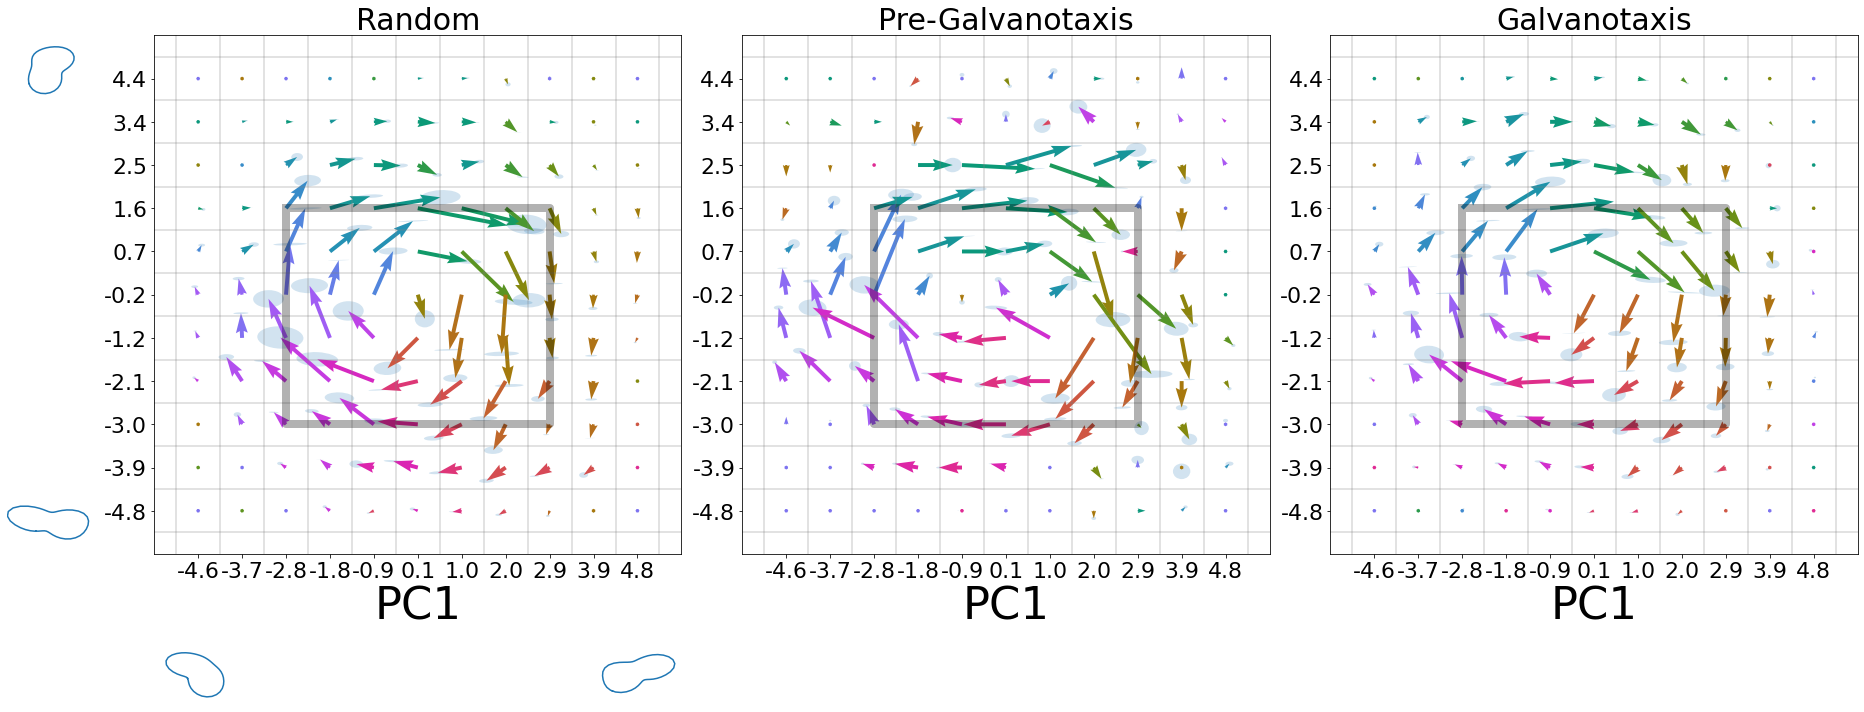

In [117]:
############## plot vectors of PC1/2 transitions from different migration modes #################

from cmocean import cm
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse
from CustomFunctions.DetailedBalance import contour_coords

# inverse scale for arrows
scale = 0.0005


# combine error data with real transition data
elldf = bsfield_sep.merge(trans_rate_df_sep,left_on = ['x','y','Migration_Mode'], right_on = ['x','y','Migration_Mode'])


#do color scales stuff
norm = matplotlib.colors.Normalize()
norm.autoscale([0,360])
cmm = cm.phase
color_scale = pd.DataFrame({'color':list(sns.diverging_palette(220, 20, n=180).as_hex()),
              'value':list(np.arange(0,180,1))})


meshdir = datadir + 'PC_Meshes/'

proj=[0,1]
PCkey = [1,2]
binkey = [1,5]      

fig = plt.figure(figsize=(10+(8*(len(elldf.Migration_Mode.unique())-1)),10))

graphaxes, axes = PCvisualization.get_contours_for_axes(meshdir,
                proj,
                PCkey,
                binkey,
                graphnum = len(elldf.Migration_Mode.unique()))

#subplots
for i, ax in enumerate(graphaxes):
    mm = elldf.Migration_Mode.unique()[i]
    mdf = elldf[elldf.Migration_Mode==mm]
    #add "grid lines" first 
    for h in np.linspace(0.5, nbins+0.5, nbins+1):
        ax.axhline(h, linestyle='-', color='grey', alpha=0.3) # horizontal lines
        ax.axvline(h, linestyle='-', color='grey', alpha=0.3) # vertical lines

    #add contou line if desired
    uple = [3,8]
    lori = [9,3]
    contourcoords = contour_coords(uple,lori)
    #actually plot the contour
    ax.plot(np.array(contourcoords)[:,0], np.array(contourcoords)[:,1], lw=8,color='black',alpha=0.3)

        
    for x in range(1,nbins+1):
        for y in range(1,nbins+1):
            current = mdf[(mdf['x'] == x) & (mdf['y'] == y)]
            xcurrent = (current.x_plus_rate - current.x_minus_rate)/2
            ycurrent = (current.y_plus_rate - current.y_minus_rate)/2

            ell = Ellipse(xy=(x+(xcurrent.values*(1/scale)),y+(ycurrent.values*(1/scale))),
                    width=np.sqrt(abs(current.eval1))*(1/scale)*2,
                      height=np.sqrt(abs(current.eval2))*(1/scale)*2,
                    angle=np.arctan2(current.evec1y,current.evec1x))
            ax.add_artist(ell)
            ell.set_alpha(0.2)

    for x in range(1,nbins+1):
        for y in range(1,nbins+1):
            current = mdf[(mdf['x'] == x) & (mdf['y'] == y)]
            xcurrent = (current.x_plus_rate - current.x_minus_rate)/2
            ycurrent = (current.y_plus_rate - current.y_minus_rate)/2
            anglecolor = (np.arctan2(xcurrent,ycurrent) *180/np.pi)+180
            ax.quiver(x,
                       y, 
                       xcurrent,
                       ycurrent,
                      angles = 'xy',
                      scale_units = 'xy',
                      scale = scale,
#                       width = 0.012,
#                       minlength = 0.8,
                      color = cmm(norm(anglecolor)))


    #         print(x, x+(xcurrent.values*scale),y,  y+(ycurrent.values*scale))
    ax.set_xlabel('PC1', fontsize = 45)

    ax.set_xticks(list(range(1,nbins+1)),[round((PC1bins[i+1]+x)/2,1) for i,x in enumerate(PC1bins[:-1])], fontsize = 22)
    ax.set_yticks(list(range(1,nbins+1)),[round((PC2bins[i+1]+x)/2,1) for i,x in enumerate(PC2bins[:-1])], fontsize = 22)
    ax.set_xlim(0,nbins+1)
    ax.set_ylim(0,nbins+1)
    ax.set_title(mm, fontsize = 30)
    
    
axes[0].set_ylabel('PC2', fontsize = 45)
plt.tight_layout()

# __a__=np.arange(0,1000*np.pi, np.pi/1.61803398875)
# __r__=0.3+np.log(1+np.arange(0, len(__a__))/len(__a__))
# ax.scatter(1-20+1*__r__*np.cos(__a__), 1+10*__r__*np.sin(__a__),5,c=np.mod(0.5-__a__/np.pi,1),cmap=cm.phase)
# ax.scatter(1.5+__r__*np.cos(__a__), 14+__r__*np.sin(__a__),5,c=np.mod(0.5-__a__/np.pi,1),cmap=cm.phase)

plt.savefig(savedir + 'PC1_PC2 Vector map absolute angle colored separated.png', bbox_inches='tight')


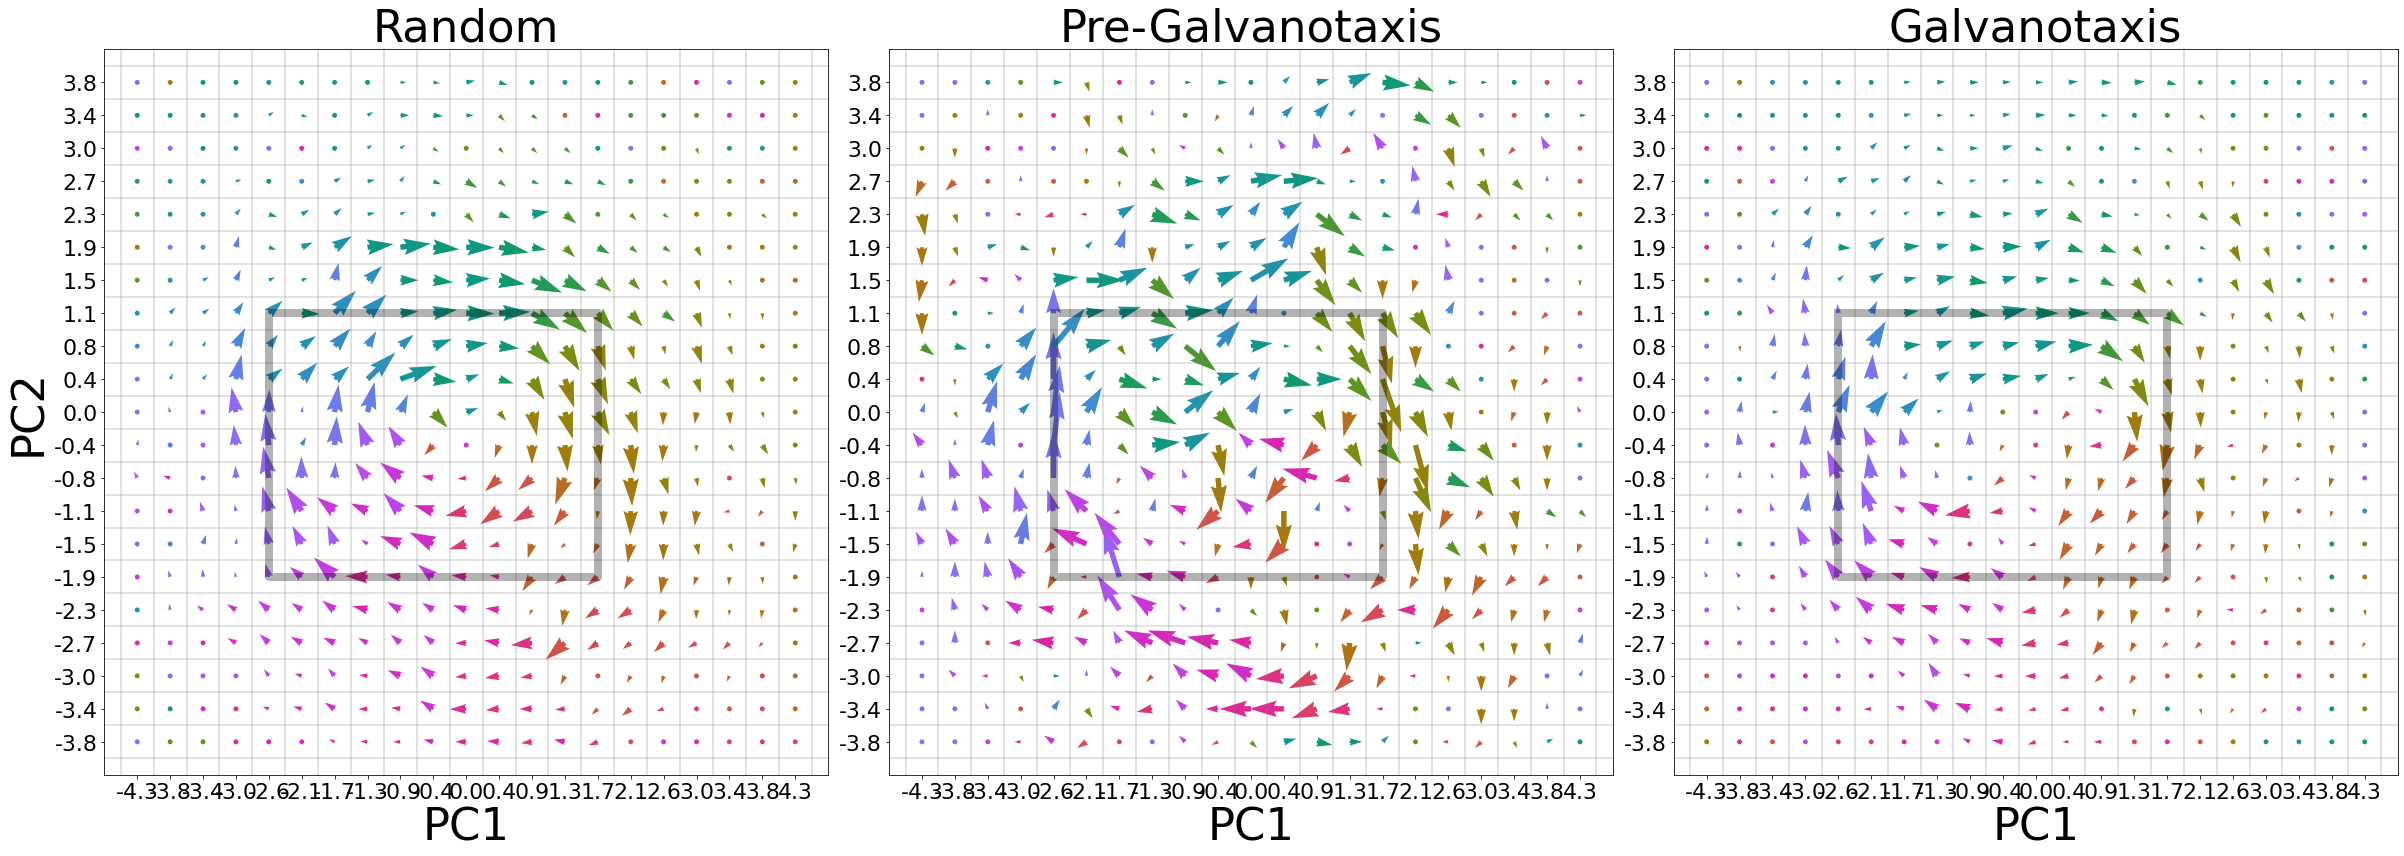

In [27]:
############## plot vectors of PC1/2 transitions from different migration modes #################

from cmocean import cm
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse
from CustomFunctions.DetailedBalance import contour_coords

# inverse scale for arrows
scale = 0.0005


# combine error data with real transition data
elldf = bsfield_sep.merge(trans_rate_df_sep,left_on = ['x','y','Migration_Mode'], right_on = ['x','y','Migration_Mode'])


#do color scales stuff
norm = matplotlib.colors.Normalize()
norm.autoscale([0,360])
cmm = cm.phase
color_scale = pd.DataFrame({'color':list(sns.diverging_palette(220, 20, n=180).as_hex()),
              'value':list(np.arange(0,180,1))})


meshdir = datadir + 'PC_Meshes/'

proj=[0,1]
PCkey = [1,2]
binkey = [1,5]      

fig, graphaxes = plt.subplots(1,3,figsize=(9.5+(12*(len(elldf.Migration_Mode.unique())-1)),12))


#subplots
for i, ax in enumerate(graphaxes):
    mm = elldf.Migration_Mode.unique()[i]
    mdf = elldf[elldf.Migration_Mode==mm]
    #add "grid lines" first 
    for h in np.linspace(0.5, nbins+0.5, nbins+1):
        ax.axhline(h, linestyle='-', color='grey', alpha=0.3) # horizontal lines
        ax.axvline(h, linestyle='-', color='grey', alpha=0.3) # vertical lines

    #add contou line if desired
    uple = [5,14]
    lori = [15,6]
    contourcoords = contour_coords(uple,lori)
    #actually plot the contour
    ax.plot(np.array(contourcoords)[:,0], np.array(contourcoords)[:,1], lw=8,color='black',alpha=0.3)

        
#     for x in range(1,nbins+1):
#         for y in range(1,nbins+1):
#             current = mdf[(mdf['x'] == x) & (mdf['y'] == y)]
#             xcurrent = (current.x_plus_rate - current.x_minus_rate)/2
#             ycurrent = (current.y_plus_rate - current.y_minus_rate)/2

#             ell = Ellipse(xy=(x+(xcurrent.values*(1/scale)),y+(ycurrent.values*(1/scale))),
#                     width=np.sqrt(abs(current.eval1))*(1/scale)*2,
#                       height=np.sqrt(abs(current.eval2))*(1/scale)*2,
#                     angle=np.arctan2(current.evec1y,current.evec1x))
#             ax.add_artist(ell)
#             ell.set_alpha(0.01)

    for x in range(1,nbins+1):
        for y in range(1,nbins+1):
            current = mdf[(mdf['x'] == x) & (mdf['y'] == y)]
            xcurrent = (current.x_plus_rate - current.x_minus_rate)/2
            ycurrent = (current.y_plus_rate - current.y_minus_rate)/2
            anglecolor = (np.arctan2(xcurrent,ycurrent) *180/np.pi)+180
            ax.quiver(x,
                       y, 
                       xcurrent,
                       ycurrent,
                      angles = 'xy',
                      scale_units = 'xy',
                      scale = scale,
#                       width = 0.012,
#                       minlength = 0.8,
                      color = cmm(norm(anglecolor)))


    #         print(x, x+(xcurrent.values*scale),y,  y+(ycurrent.values*scale))
    ax.set_xlabel('PC1', fontsize = 45)

    ax.set_xticks(list(range(1,nbins+1)),[round(x,1) for x in centers.PC1.to_list()], fontsize = 22)
    ax.set_yticks(list(range(1,nbins+1)),[round(x,1) for x in centers.PC2.to_list()], fontsize = 22)
    ax.set_xlim(0,nbins+1)
    ax.set_ylim(0,nbins+1)
    ax.set_title(mm, fontsize = 45)
    
    
graphaxes[0].set_ylabel('PC2', fontsize = 45)
plt.tight_layout()

# __a__=np.arange(0,1000*np.pi, np.pi/1.61803398875)
# __r__=0.3+np.log(1+np.arange(0, len(__a__))/len(__a__))
# ax.scatter(1-20+1*__r__*np.cos(__a__), 1+10*__r__*np.sin(__a__),5,c=np.mod(0.5-__a__/np.pi,1),cmap=cm.phase)
# ax.scatter(1.5+__r__*np.cos(__a__), 14+__r__*np.sin(__a__),5,c=np.mod(0.5-__a__/np.pi,1),cmap=cm.phase)

plt.savefig(savedir + 'PC1_PC2 Vector map.png', bbox_inches='tight', dpi = 500)


In [24]:
######### do contour integrals for all migration modes ################
from CustomFunctions.DetailedBalance import contour_integral
#upper left position of contour box
uple = [5,14]
#lower right position of contour box
lori = [15,6]

if os.path.exists(savedir+f'Contour_integrals_uple{uple}_lori{lori}_separated.csv'):
    omegaframesep = pd.read_csv(savedir+f'Contour_integrals_uple{uple}_lori{lori}_separated.csv', index_col=0)
    individualoms = pd.read_csv(savedir+f'Individual_Contour_integrals_uple{uple}_lori{lori}_separated.csv', index_col=0)
    
    omegaframesep['Migration_Mode'] = pd.Categorical(omegaframesep.Migration_Mode, categories=['Random','Pre-Galvanotaxis','Galvanotaxis'], ordered=True)
    omegaframesep = omegaframesep.sort_values(by='Migration_Mode')
    individualoms['Migration_Mode'] = pd.Categorical(individualoms.Migration_Mode, categories=['Random','Pre-Galvanotaxis','Galvanotaxis'], ordered=True)
    individualoms = individualoms.sort_values(by='Migration_Mode')
else:
    omega_results = []
    dot_results = []
    for i, m in bsframe_sep_full.groupby('Migration_Mode'):
        omegas = []
        dots = []
        for l, b in m.groupby('bs_iteration'):
            om, ol = contour_integral(b, uple, lori, False)
            omegas.append(om)
            dots.append(pd.DataFrame(ol))
        omega_results.append([i,omegas])
        tempdots = pd.concat(dots)
        tempdots['Migration_Mode'] = pd.Categorical([i] * len(tempdots), categories=['Random','Pre-Galvanotaxis','Galvanotaxis'], ordered=True)
        dot_results.append(tempdots)
    omegaframesep = pd.DataFrame([o[1] for o in omega_results], index = [o[0] for o in omega_results])
    dlist = []
    for m in omegaframesep.T.columns.to_list():
        dlist.append(pd.DataFrame(list(zip(omegaframesep.T[m].to_list(), [m]*len(omegaframesep.T))), columns=['bootstrap_omega','Migration_Mode']))
    omegaframesep = pd.concat(dlist)
    omegaframesep.to_csv(savedir+f'Contour_integrals_uple{uple}_lori{lori}_separated.csv')
    individualoms = pd.concat(dot_results)
    individualoms.columns = ['x','y','dotprod','Migration_Mode']
    individualoms.to_csv(savedir+f'Individual_Contour_integrals_uple{uple}_lori{lori}_separated.csv')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


F value: 197.18950892516648, p value: 2.9459106677704193e-85
          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1           group2      meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------
    Galvanotaxis Pre-Galvanotaxis   0.0001 0.2809 -0.0001 0.0004  False
    Galvanotaxis           Random   0.0017   -0.0  0.0015 0.0019   True
Pre-Galvanotaxis           Random   0.0016   -0.0  0.0013 0.0018   True
-----------------------------------------------------------------------


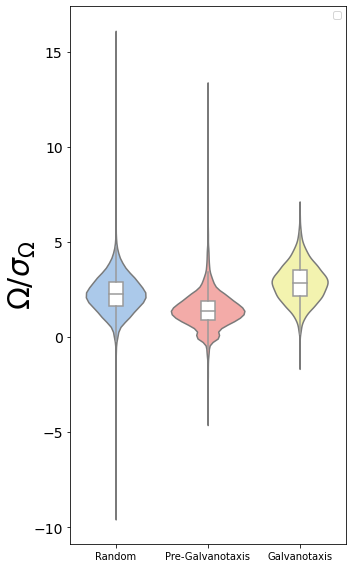

In [25]:
################ histograms of the contour integral distributions ###########

colorlist = [list(sns.color_palette('pastel').as_hex())[i] for i in [0,3,8]]

#calculate the normalized omegas
stds = []
for i,m in omegaframesep.groupby('Migration_Mode'):
    stds.extend(m.bootstrap_omega/m.bootstrap_omega.std())
omegaframesep['Norm_Omegas'] = stds

fig, ax = plt.subplots(figsize=(5,8))#, sharex=True)
#plots
sns.violinplot(data=omegaframesep, x='Migration_Mode', y='Norm_Omegas', 
               palette = colorlist, inner = None, ax=ax, )#order=['Random', 'Chem_Directed', 'Galv'])
sns.boxplot(data=omegaframesep, x='Migration_Mode', y='Norm_Omegas', width = 0.15, 
        color = 'white', showcaps=False, fliersize=0, boxprops={'zorder': 2}, 
            ax=ax, )#order=['Random', 'Chem_Directed', 'Galv'])

#labels
ax.set_ylabel('$Ω/σ_{Ω}$', fontsize=30, labelpad=-5)
ax.set_xlabel('', fontsize=20)
ax.tick_params('y', labelsize=14)
# ax.set_xticklabels(['Random','Chemotaxis','Galvanotaxis'], fontsize = 14)



plt.legend()
plt.tight_layout()

plt.savefig(savedir + f'contour integral of uple{uple} and lori{lori} separated.png', bbox_inches='tight')


import scipy.stats as ss


f_val, p_val = ss.f_oneway(*[m.dropna().bootstrap_omega.to_list() for i,m in omegaframesep.groupby('Migration_Mode')])
print(f'F value: {f_val}, p value: {p_val}')
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print(pairwise_tukeyhsd(omegaframesep.dropna().bootstrap_omega, omegaframesep.dropna().Migration_Mode))



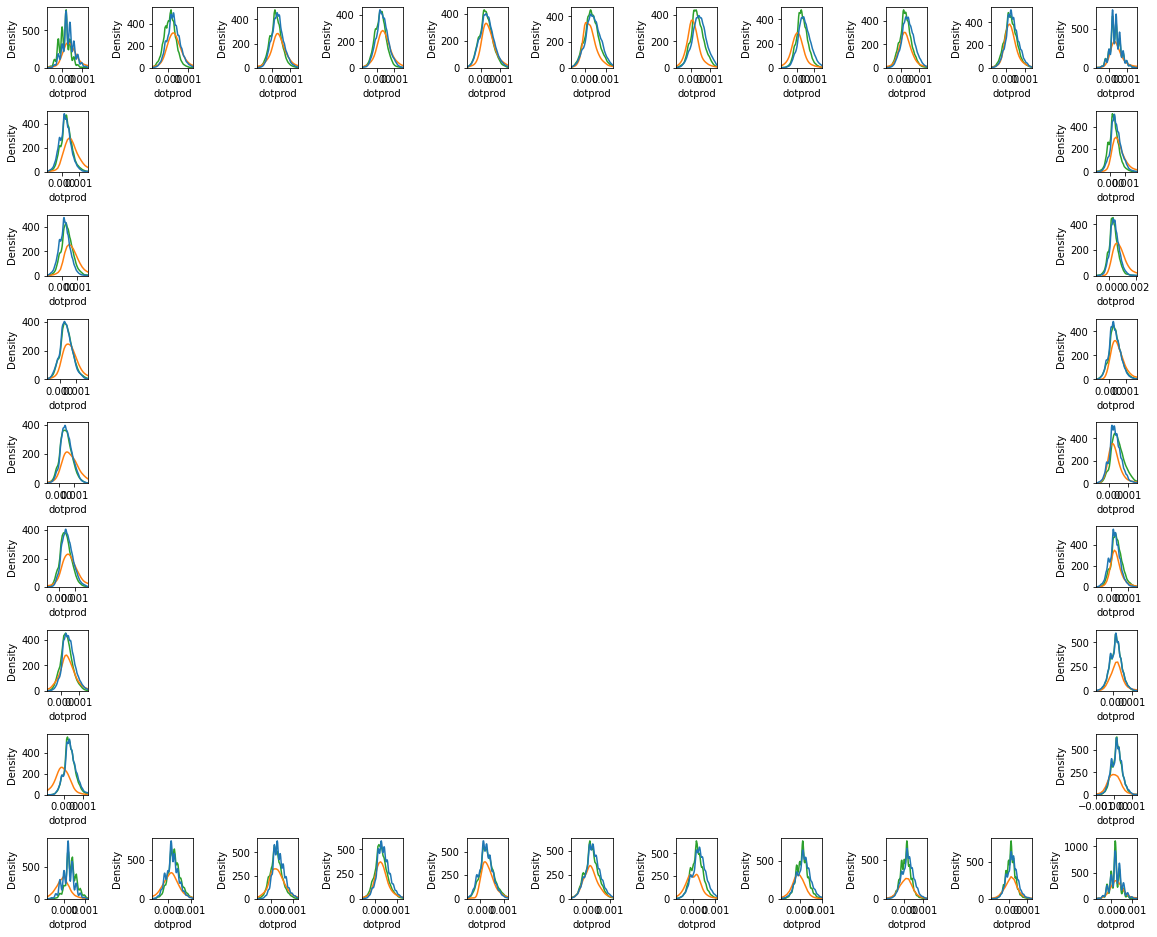

In [26]:
############ graph individual loop dot product distributions ##########
import seaborn as sns

fig, axes = plt.subplots(nbins, nbins, figsize = (30,30))
for x in range(nbins):
    for y in range(nbins):
        current = individualoms[(individualoms['x'] == x+1) & (individualoms['y'] == y+1)]
        if current.empty:
#             pass
#             print('empty')
            fig.delaxes(axes[nbins-y-1, x])
        else:
#             print(current)
            sns.kdeplot(data = current.reset_index(), x = 'dotprod',hue = 'Migration_Mode', ax = axes[nbins-y-1, x])
            stdzp = current.dotprod.mean()+(current.dotprod.std() * 2.5)
            stdzn = current.dotprod.mean()-(current.dotprod.std() * 2.51)
            axes[nbins-y-1, x].set_xlim([stdzn,stdzp])
            axes[nbins-y-1, x].get_legend().remove()
plt.tight_layout()

In [52]:
######### do NORMALIZED contour integrals for all migration modes ################
import itertools
from CustomFunctions.DetailedBalance import contour_integral
#upper left position of contour box
uple = [4,8]
#lower right position of contour box
lori = [8,4]

if os.path.exists(savedir+f'Contour_integrals_uple{uple}_lori{lori}_separated_normalized.csv'):
    omegaframesep_norm = pd.read_csv(savedir+f'Contour_integrals_uple{uple}_lori{lori}_separated_normalized.csv', index_col=0)
    individualoms = pd.read_csv(savedir+f'Individual_Contour_integrals_uple{uple}_lori{lori}_separated_normalized.csv', index_col=0)
    
    omegaframesep_norm['Migration_Mode'] = pd.Categorical(omegaframesep_norm.Migration_Mode, categories=['Random','Pre-Galvanotaxis','Galvanotaxis'], ordered=True)
    omegaframesep_norm = omegaframesep_norm.sort_values(by='Migration_Mode')
    individualoms_norm['Migration_Mode'] = pd.Categorical(individualoms_norm.Migration_Mode, categories=['Random','Pre-Galvanotaxis','Galvanotaxis'], ordered=True)
    individualoms_norm = individualoms_norm.sort_values(by='Migration_Mode')
    
else:
    omega_results = []
    dot_results = []
    for i, m in bsframe_sep_full.groupby('Migration_Mode'):
        omegas = []
        dots = []
        for l, b in m.groupby('bs_iteration'):
            om, ol = contour_integral(b, uple, lori, True)
            omegas.append(om)
            dots.append(pd.DataFrame(ol))
        omega_results.append([i,omegas])
        tempdots = pd.concat(dots)
        tempdots['Migration_Mode'] = pd.Categorical([i] * len(tempdots), categories=['Random','Pre-Galvanotaxis','Galvanotaxis'], ordered=True)
        dot_results.append(tempdots)
    omegaframesep_norm = pd.DataFrame([o[1] for o in omega_results], index = [o[0] for o in omega_results])
    dlist = []
    for m in omegaframesep_norm.T.columns.to_list():
        dlist.append(pd.DataFrame(list(zip(omegaframesep_norm.T[m].to_list(), [m]*len(omegaframesep_norm.T))), columns=['bootstrap_omega','Migration_Mode']))
    omegaframesep_norm = pd.concat(dlist)
    omegaframesep_norm.to_csv(savedir+f'Contour_integrals_uple{uple}_lori{lori}_separated_normalized.csv')
    individualoms_norm = pd.concat(dot_results)
    individualoms_norm.columns = ['x','y','dotprod','Migration_Mode']
    individualoms_norm.to_csv(savedir+f'Individual_Contour_integrals_uple{uple}_lori{lori}_separated_normalized.csv')
    

F value: nan, p value: nan
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
     group1           group2      meandiff p-adj lower upper reject
-------------------------------------------------------------------
    Galvanotaxis Pre-Galvanotaxis      nan   nan   nan   nan  False
    Galvanotaxis           Random      nan   nan   nan   nan  False
Pre-Galvanotaxis           Random      nan   nan   nan   nan  False
-------------------------------------------------------------------


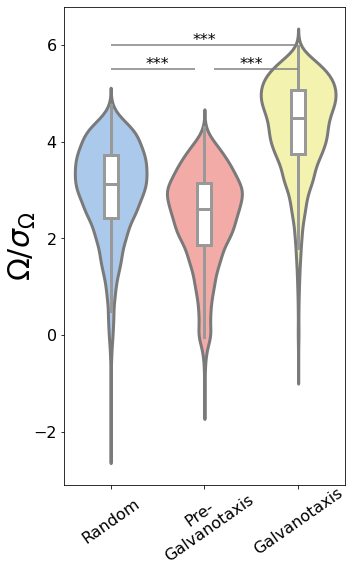

In [53]:
################ histograms of the contour integral distributions ###########

colorlist = [list(sns.color_palette('pastel').as_hex())[i] for i in [0,3,8]]

#calculate the normalized omegas
stds = []
for i,m in omegaframesep_norm.groupby('Migration_Mode'):
    stds.extend(m.bootstrap_omega/m.bootstrap_omega.std())
omegaframesep_norm['Norm_Omegas'] = stds

fig, ax = plt.subplots(figsize=(5,8))#, sharex=True)
#plots
sns.violinplot(data=omegaframesep_norm, x='Migration_Mode', y='Norm_Omegas', 
               palette = colorlist, inner = None, linewidth=3, ax=ax, )#order=['Random', 'Chem_Directed', 'Galv'])
sns.boxplot(data=omegaframesep_norm, x='Migration_Mode', y='Norm_Omegas', width = 0.15, 
        color = 'white', showcaps=False, linewidth=3, fliersize=0, boxprops={'zorder': 2}, 
            ax=ax, )#order=['Random', 'Chem_Directed', 'Galv'])

#labels
ax.set_ylabel('$Ω/σ_{Ω}$', fontsize=30, labelpad=-5)
ax.set_xlabel('', fontsize=24)
ax.tick_params('y', labelsize=16)
ax.set_xticklabels(labels = ['Random','Pre-\nGalvanotaxis','Galvanotaxis'], fontdict= {'fontsize': 16,
                                                                                      'verticalalignment':'center',
                                                                                      'rotation':35,
                                                                                      'y':-.06})#fontsize = 16, rotation = 35)
# ax.tick_params('x', labelsize=16, rotation = 35)
plt.hlines(6, 0, 2, colors='grey', linestyles='solid')
ax.text(1,6.01,'***',fontdict= {'fontsize': 16,
                               'horizontalalignment':'center'})
plt.hlines(5.5, 0, .9, colors='grey', linestyles='solid')
ax.text(0.5,5.51,'***',fontdict= {'fontsize': 16,
                               'horizontalalignment':'center'})
plt.hlines(5.5, 1.1, 2, colors='grey', linestyles='solid')
ax.text(1.5,5.51,'***',fontdict= {'fontsize': 16,
                               'horizontalalignment':'center'})

plt.tight_layout()

plt.savefig(savedir + f'contour integral of uple{uple} and lori{lori} separated normalized.png', bbox_inches='tight', dpi = 500)


import scipy.stats as ss


f_val, p_val = ss.f_oneway(*[m.bootstrap_omega.to_list() for i,m in omegaframesep_norm.groupby('Migration_Mode')])
print(f'F value: {f_val}, p value: {p_val}')
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print(pairwise_tukeyhsd(omegaframesep_norm.bootstrap_omega, omegaframesep_norm.Migration_Mode))



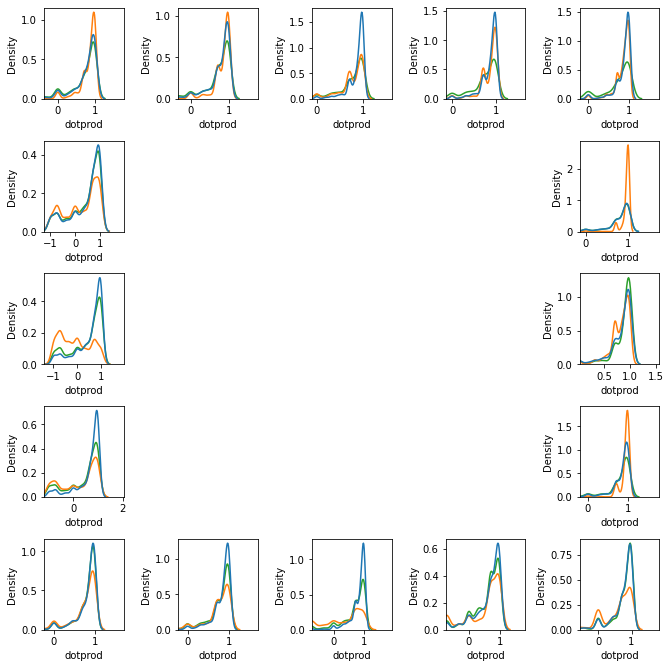

In [54]:
############ graph individual NORMALIZED loop dot product distributions ##########
import seaborn as sns

fig, axes = plt.subplots(nbins, nbins, figsize = (20,20))
for x in range(nbins):
    for y in range(nbins):
        current = individualoms_norm[(individualoms_norm['x'] == x+1) & (individualoms_norm['y'] == y+1)]
        if current.empty:
#             pass
#             print('empty')
            fig.delaxes(axes[nbins-y-1, x])
        else:
#             print(current)
            sns.kdeplot(data = current.reset_index(), x = 'dotprod',hue = 'Migration_Mode', ax = axes[nbins-y-1, x])
            stdzp = current.dotprod.mean()+(current.dotprod.std() * 2.5)
            stdzn = current.dotprod.mean()-(current.dotprod.std() * 2.51)
            axes[nbins-y-1, x].set_xlim([stdzn,stdzp])
            axes[nbins-y-1, x].get_legend().remove()
plt.tight_layout()

C:\Users\Aaron\anaconda3\envs\abhishape\lib\site-packages\ipykernel_launcher.py:65: UserWarning: FixedFormatter should only be used together with FixedLocator


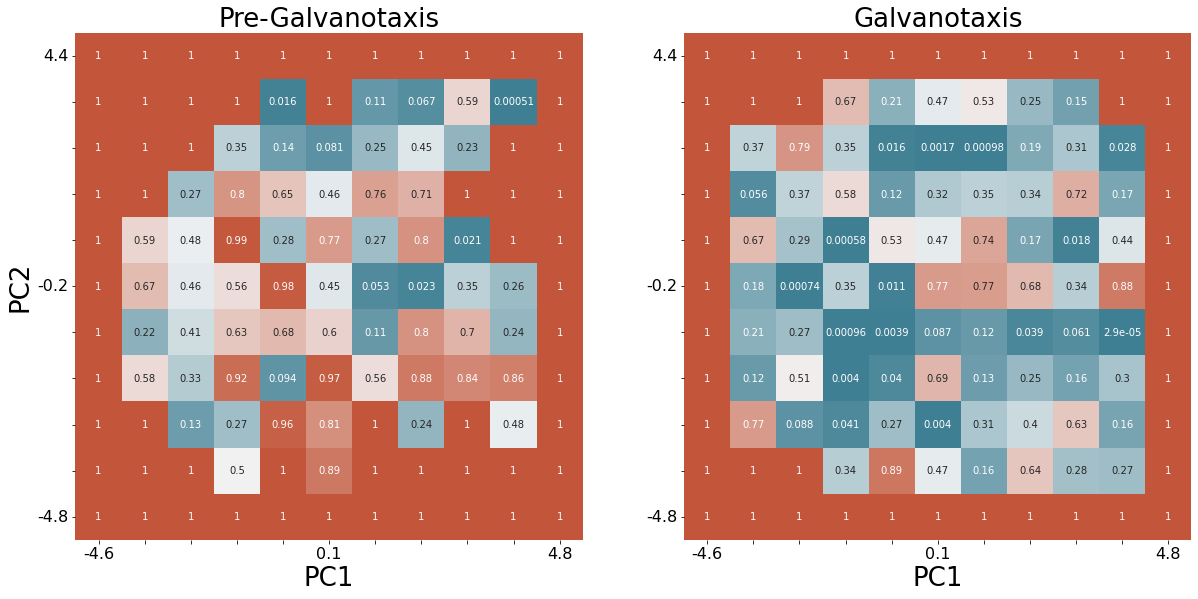

In [145]:
def cs(n, y):
    return scipy.stats.chisquare(n, np.sum(n)/np.sum(y) * y)
fig, axes = plt.subplots(1,len(transdf_sep.Migration_Mode.unique())-1,figsize=(20,10))
iterr = 0
for i, t in enumerate(trans_rate_df_sep.Migration_Mode.unique()):
    if t != "Random":
        ax = axes[iterr]
        iterr = iterr+1
        bighm = np.zeros((nbins,nbins))
        treat = trans_rate_df_sep[trans_rate_df_sep.Migration_Mode == t]
        cont= trans_rate_df_sep[trans_rate_df_sep.Migration_Mode == 'Random']
        for x in range(1,nbins+1):
            for y in range(1,nbins+1):
                currenttreat = treat[(treat['x'] == x) & (treat['y'] == y)]
                currentcontrol = cont[(cont['x'] == x) & (cont['y'] == y)]
                if (sum((currentcontrol[[x for x in currentcontrol.columns.to_list() if 'count' in x and 'rev' not in x]] ==0).all().to_list()) > 0) or (sum((currenttreat[[x for x in currenttreat.columns.to_list() if 'count' in x and 'rev' not in x]] ==0).all().to_list())>0):
                    pval = 1
                else:
                    chisq, pval = cs(currenttreat[[x for x in currenttreat.columns.to_list() if 'count' in x and 'rev' not in x]].to_numpy()[0],
                                     currentcontrol[[x for x in currentcontrol.columns.to_list() if 'count' in x and 'rev' not in x]].to_numpy()[0])
                bighm[y-1,x-1] = pval
                


        #plot heatmap with seaborn
        sns.heatmap(
            bighm,
            vmin=0, vmax=1, #center=0,
            cmap=sns.diverging_palette(220, 20, n=200),
            square=True,
            xticklabels = True,
            yticklabels = True,
            ax = ax,
            annot=True,
            cbar=i==0,
            cbar_ax = None if i else cbar_ax,
    #         cbar_kws=cbar_kws
        )
        ax.set_xticklabels(
            [round((PC1bins[i+1]+x)/2,1) for i,x in enumerate(PC1bins[:-1])],
            fontsize = 16
        )
        ax.set_yticklabels(
            [round((PC2bins[i+1]+x)/2,1) for i,x in enumerate(PC2bins[:-1])],
            rotation=0,
            fontsize = 16
        )
        #take out all axis labels except the desired ones
        for i, l in enumerate(ax.xaxis.get_ticklabels()):
            if i%5 != 0:
                l.set_visible(False)
        for i, l in enumerate(ax.yaxis.get_ticklabels()):
            if i%5 != 0:
                l.set_visible(False)
        #set axis titles
        ax.set_xlabel('PC1', fontsize = 26)

        #correct axis orientations
        ax.invert_yaxis()
        #set title
        ax.set_title(t, fontsize = 26)


# adjust colorbar tick label size
cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(),fontsize=18)
#set axis title
axes[0].set_ylabel('PC2', fontsize = 26)
    
plt.savefig(savedir + 'PC1_PC2 chi squared maps separated.png', bbox_inches='tight')

C:\Users\Aaron\anaconda3\envs\abhishape\lib\site-packages\ipykernel_launcher.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator


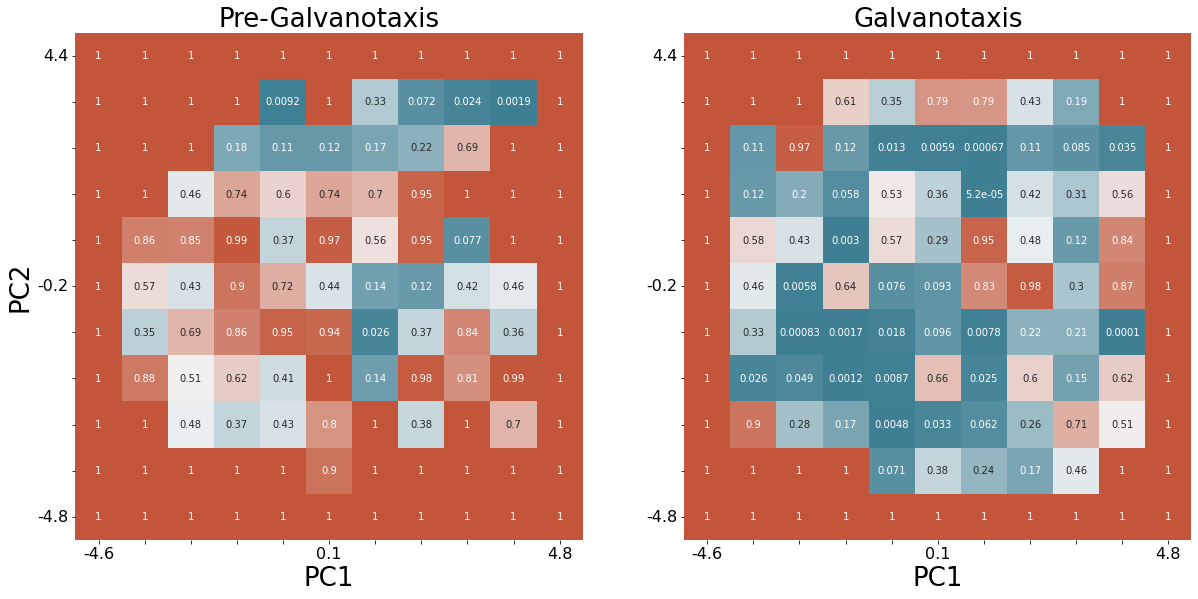

In [146]:
############## chi square heatmaps with forward and reverse rates
def cs(n, y):
    return scipy.stats.chisquare(n, np.sum(n)/np.sum(y) * y)
fig, axes = plt.subplots(1,len(transdf_sep.Migration_Mode.unique())-1,figsize=(20,10))
iterr = 0
for i, t in enumerate(trans_rate_df_sep.Migration_Mode.unique()):
    if t != "Random":
        ax = axes[iterr]
        iterr = iterr+1
        bighm = np.zeros((nbins,nbins))
        treat = trans_rate_df_sep[trans_rate_df_sep.Migration_Mode == t]
        cont= trans_rate_df_sep[trans_rate_df_sep.Migration_Mode == 'Random']
        for x in range(1,nbins+1):
            for y in range(1,nbins+1):
                currenttreat = treat[(treat['x'] == x) & (treat['y'] == y)]
                currentcontrol = cont[(cont['x'] == x) & (cont['y'] == y)]
                if (sum((currentcontrol[[x for x in currentcontrol.columns.to_list() if 'count' in x]] ==0).all().to_list()) > 0) or (sum((currenttreat[[x for x in currenttreat.columns.to_list() if 'count' in x and 'rev' not in x]] ==0).all().to_list())>0):
                    pval = 1
                else:
                    chisq, pval = cs(currenttreat[[x for x in currenttreat.columns.to_list() if 'count' in x]].to_numpy()[0],
                                     currentcontrol[[x for x in currentcontrol.columns.to_list() if 'count' in x]].to_numpy()[0])
                bighm[y-1,x-1] = pval
                


        #plot heatmap with seaborn
        sns.heatmap(
            bighm,
            vmin=0, vmax=1, #center=0,
            cmap=sns.diverging_palette(220, 20, n=200),
            square=True,
            xticklabels = True,
            yticklabels = True,
            ax = ax,
            annot=True,
            cbar=i==0,
            cbar_ax = None if i else cbar_ax,
    #         cbar_kws=cbar_kws
        )
        ax.set_xticklabels(
            [round((PC1bins[i+1]+x)/2,1) for i,x in enumerate(PC1bins[:-1])],
            fontsize = 16
        )
        ax.set_yticklabels(
            [round((PC2bins[i+1]+x)/2,1) for i,x in enumerate(PC2bins[:-1])],
            rotation=0,
            fontsize = 16
        )
        #take out all axis labels except the desired ones
        for i, l in enumerate(ax.xaxis.get_ticklabels()):
            if i%5 != 0:
                l.set_visible(False)
        for i, l in enumerate(ax.yaxis.get_ticklabels()):
            if i%5 != 0:
                l.set_visible(False)
        #set axis titles
        ax.set_xlabel('PC1', fontsize = 26)

        #correct axis orientations
        ax.invert_yaxis()
        #set title
        ax.set_title(t, fontsize = 26)


# adjust colorbar tick label size
cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(),fontsize=18)
#set axis title
axes[0].set_ylabel('PC2', fontsize = 26)
    
plt.savefig(savedir + 'PC1_PC2 chi squared FR maps separated.png', bbox_inches='tight')

In [6]:
individualoms.columns = ['x','y','dotprod','Migration_Mode']
individualoms.dotprod

0     0.000000
1     0.000555
0     0.000392
18    0.000277
17   -0.000139
        ...   
14    0.000196
13    0.000278
12    0.000000
2     0.001386
17    0.000693
Name: dotprod, Length: 281062, dtype: float64

In [47]:
for x in range(nbins):
    for y in range(nbins):
        print(nbins-y-1, x)
fig, axes = plt.subplots(nbins, nbins, figsize = (20,20))

10 0
9 0
8 0
7 0
6 0
5 0
4 0
3 0
2 0
1 0
0 0
10 1
9 1
8 1
7 1
6 1
5 1
4 1
3 1
2 1
1 1
0 1
10 2
9 2
8 2
7 2
6 2
5 2
4 2
3 2
2 2
1 2
0 2
10 3
9 3
8 3
7 3
6 3
5 3
4 3
3 3
2 3
1 3
0 3
10 4
9 4
8 4
7 4
6 4
5 4
4 4
3 4
2 4
1 4
0 4
10 5
9 5
8 5
7 5
6 5
5 5
4 5
3 5
2 5
1 5
0 5
10 6
9 6
8 6
7 6
6 6
5 6
4 6
3 6
2 6
1 6
0 6
10 7
9 7
8 7
7 7
6 7
5 7
4 7
3 7
2 7
1 7
0 7
10 8
9 8
8 8
7 8
6 8
5 8
4 8
3 8
2 8
1 8
0 8
10 9
9 9
8 9
7 9
6 9
5 9
4 9
3 9
2 9
1 9
0 9
10 10
9 10
8 10
7 10
6 10
5 10
4 10
3 10
2 10
1 10
0 10


In [47]:
############### get shcoeffs for different positions around a particular 2d contour #############
from CustomFunctions.PCvisualization import interpolate_contour_shapes
import pickle as pk
from scipy import interpolate
from scipy.spatial import distance
avgpcs = TotalFrame[[x for x in TotalFrame.columns.to_list() if 'PC' in x and 'bin' not in x]].mean().to_numpy()

pca = pk.load(open(savedir+"pca.pkl",'rb'))

whichpcs = [1,2]
lmax = 10

vertices = np.array([[4,7],
[4,3],
[9,3],
[9,7]])

contour_positions, loopname = interpolate_contour_shapes(vertices,
                               avgpcs,
                               whichpcs,
                               pca,
                               PC1bins,
                               PC2bins,
                               savedir,
                               lmax)

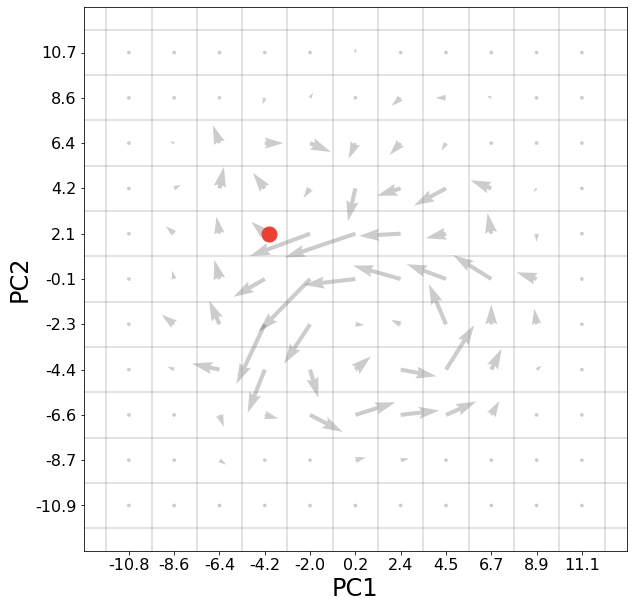

In [48]:
########## animate a contour loop graph
from matplotlib.animation import FuncAnimation 

scale = 0.0005

#make fig
fig, ax = plt.subplots(figsize = (10,10))

#add "grid lines" first 
for h in np.linspace(0.5, nbins+0.5, nbins+1):
    ax.axhline(h, linestyle='-', color='grey', alpha=0.3) # horizontal lines
    ax.axvline(h, linestyle='-', color='grey', alpha=0.3) # vertical lines

    

for x in range(nbins):
    for y in range(nbins):
        current = trans_rate_df[(trans_rate_df['x'] == x+1) & (trans_rate_df['y'] == y+1)]
        xcurrent = (current.x_plus_rate - current.x_minus_rate)/2
        ycurrent = (current.y_plus_rate - current.y_minus_rate)/2
#             print(anglecolor)
        ax.quiver((x+1),
                   (y+1), 
                   xcurrent, 
                   ycurrent,
                  angles = 'xy',
                  scale_units = 'xy',
                  scale = scale,
#                   width = 0.012,
#                   minlength = 0.8,
                  color = 'black',
                 alpha = 0.2)    
    
    

ax.set_aspect("equal")
ax.set_xlabel('PC1', fontsize = 24)
ax.set_ylabel('PC2', fontsize = 24)
ax.set_xticks(list(range(1,nbins+1)),[round((PC1bins[i+1]+x)/2,1) for i,x in enumerate(PC1bins[:-1])], fontsize = 16)
ax.set_yticks(list(range(1,nbins+1)),[round((PC2bins[i+1]+x)/2,1) for i,x in enumerate(PC2bins[:-1])], fontsize = 16)
ax.set_xlim(0,nbins+1)
ax.set_ylim(0,nbins+1)
# ax.set_title(mm, fontsize = 30)


# create a point in the axes
point, = ax.plot(contour_positions[0,1],contour_positions[0,2], marker="o", color = '#eb4034', markersize = 15)

# make function for updating point position
def animate(i, contour_positions):
    point.set_data([contour_positions[i,1]], [contour_positions[i,2]])
    return point,

ani = FuncAnimation(fig, animate, interval=10, blit=True, repeat=True,
                    frames=list(range(len(contour_positions))), fargs = (contour_positions,))
# plt.show()

ani.save(savedir + 'contours/' + loopname + f'/{loopname}_plotanimation_PC1-PC2.mp4', fps=30, dpi = 200)#, extra_args=['-vcodec', 'libx264'])


In [173]:
############## get the actual bin position reconstructions for still images ##########

from CustomFunctions.PCanimation import animate_PCs

avgpcs = TotalFrame[[x for x in TotalFrame.columns.to_list() if 'PC' in x and 'bin' not in x]].mean().to_numpy()

pca = pk.load(open(savedir+"pca.pkl",'rb'))

whichpcs = [1,2]
lmax = 10



fourcorners = np.array([[4,7],
[4,3],
[9,3],
[9,7]])



for x in fourcorners:
    #translate pc bins into actual pcs
    PCs = [(PC1bins[x[0]-1]+PC1bins[x[0]])/2, (PC2bins[x[1]-1]+PC2bins[x[1]])/2]

    specificdir = savedir + str(x) + '.vtp'
    animate_PCs(avgpcs, #average value for all PCs generated with the pca
            whichpcs, #which PC number is being reconstructed
            PCs, #list of PCs, [0] is the first PC, [1] is the second
            pca, #actual pca file
            specificdir,
            lmax,)